# Understanding Dataset using "xarray"
#### Dataset --> 1979 (12 months)
#### Tutorial--> //tutorial.xarray.dev/overview/xarray-in-45-min.html#concepts-for-computation

In [241]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

xr.set_options(keep_attrs=True, display_expand_data=False)
np.set_printoptions(threshold=10, edgeitems=2)

%xmode minimal
%matplotlib inline
%config InlineBackend.figure_format='retina'

Exception reporting mode: Minimal


In [243]:
ds=xr.open_dataset('dataset.nc')
ds

<xarray.Dataset> Size: 81MB
Dimensions:     (valid_time: 365, latitude: 121, longitude: 461)
Coordinates:
    number      int64 8B ...
  * latitude    (latitude) float64 968B 45.0 44.75 44.5 ... 15.5 15.25 15.0
  * longitude   (longitude) float64 4kB 35.0 35.25 35.5 ... 149.5 149.8 150.0
  * valid_time  (valid_time) datetime64[ns] 3kB 1979-01-01 ... 1979-12-31
Data variables:
    t2m         (valid_time, latitude, longitude) float32 81MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-12-02T05:49 GRIB to CDM+CF via cfgrib-0.9.1...

In [12]:
ds['t2m']

<xarray.DataArray 't2m' (valid_time: 365, latitude: 121, longitude: 461)> Size: 81MB
[20360065 values with dtype=float32]
Coordinates:
    number      int64 8B ...
  * latitude    (latitude) float64 968B 45.0 44.75 44.5 ... 15.5 15.25 15.0
  * longitude   (longitude) float64 4kB 35.0 35.25 35.5 ... 149.5 149.8 150.0
  * valid_time  (valid_time) datetime64[ns] 3kB 1979-01-01 ... 1979-12-31
Attributes: (12/32)
    GRIB_paramId:                             167
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      55781
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_totalNumber:                         0
    GRIB_units:                               K
    long_name:                                2 metre temperature
    units:                                    K
    standard_name:                            unknown
    GRIB_surface:                             0.0

In [14]:
ds.t2m

<xarray.DataArray 't2m' (valid_time: 365, latitude: 121, longitude: 461)> Size: 81MB
[20360065 values with dtype=float32]
Coordinates:
    number      int64 8B ...
  * latitude    (latitude) float64 968B 45.0 44.75 44.5 ... 15.5 15.25 15.0
  * longitude   (longitude) float64 4kB 35.0 35.25 35.5 ... 149.5 149.8 150.0
  * valid_time  (valid_time) datetime64[ns] 3kB 1979-01-01 ... 1979-12-31
Attributes: (12/32)
    GRIB_paramId:                             167
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      55781
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_totalNumber:                         0
    GRIB_units:                               K
    long_name:                                2 metre temperature
    units:                                    K
    standard_name:                            unknown
    GRIB_surface:                             0.0

In [16]:
da=ds.t2m
da.name

't2m'

In [18]:
da.dims


('valid_time', 'latitude', 'longitude')

In [20]:
ds.dims

FrozenMappingWarningOnValuesAccess({'valid_time': 365, 'latitude': 121, 'longitude': 461})

In [29]:
ds.coords


Coordinates:
    number      int64 8B ...
  * latitude    (latitude) float64 968B 45.0 44.75 44.5 ... 15.5 15.25 15.0
  * longitude   (longitude) float64 4kB 35.0 35.25 35.5 ... 149.5 149.8 150.0
  * valid_time  (valid_time) datetime64[ns] 3kB 1979-01-01 ... 1979-12-31

In [31]:
da.coords

Coordinates:
    number      int64 8B ...
  * latitude    (latitude) float64 968B 45.0 44.75 44.5 ... 15.5 15.25 15.0
  * longitude   (longitude) float64 4kB 35.0 35.25 35.5 ... 149.5 149.8 150.0
  * valid_time  (valid_time) datetime64[ns] 3kB 1979-01-01 ... 1979-12-31

In [35]:
# extracting coordinate variables
da.longitude

<xarray.DataArray 'longitude' (longitude: 461)> Size: 4kB
35.0 35.25 35.5 35.75 36.0 36.25 36.5 ... 148.8 149.0 149.2 149.5 149.8 150.0
Coordinates:
    number     int64 8B ...
  * longitude  (longitude) float64 4kB 35.0 35.25 35.5 ... 149.5 149.8 150.0
Attributes:
    units:          degrees_east
    standard_name:  longitude
    long_name:      longitude

In [37]:
# extracting coordinate variables from .coords
da.coords["longitude"]

<xarray.DataArray 'longitude' (longitude: 461)> Size: 4kB
35.0 35.25 35.5 35.75 36.0 36.25 36.5 ... 148.8 149.0 149.2 149.5 149.8 150.0
Coordinates:
    number     int64 8B ...
  * longitude  (longitude) float64 4kB 35.0 35.25 35.5 ... 149.5 149.8 150.0
Attributes:
    units:          degrees_east
    standard_name:  longitude
    long_name:      longitude

In [39]:
da.attrs

{'GRIB_paramId': 167,
 'GRIB_dataType': 'an',
 'GRIB_numberOfPoints': 55781,
 'GRIB_typeOfLevel': 'surface',
 'GRIB_stepUnits': 1,
 'GRIB_stepType': 'instant',
 'GRIB_gridType': 'regular_ll',
 'GRIB_uvRelativeToGrid': 0,
 'GRIB_NV': 0,
 'GRIB_Nx': 461,
 'GRIB_Ny': 121,
 'GRIB_cfName': 'unknown',
 'GRIB_cfVarName': 't2m',
 'GRIB_gridDefinitionDescription': 'Latitude/Longitude Grid',
 'GRIB_iDirectionIncrementInDegrees': 0.25,
 'GRIB_iScansNegatively': 0,
 'GRIB_jDirectionIncrementInDegrees': 0.25,
 'GRIB_jPointsAreConsecutive': 0,
 'GRIB_jScansPositively': 0,
 'GRIB_latitudeOfFirstGridPointInDegrees': 45.0,
 'GRIB_latitudeOfLastGridPointInDegrees': 15.0,
 'GRIB_longitudeOfFirstGridPointInDegrees': 35.0,
 'GRIB_longitudeOfLastGridPointInDegrees': 150.0,
 'GRIB_missingValue': 3.4028234663852886e+38,
 'GRIB_name': '2 metre temperature',
 'GRIB_shortName': '2t',
 'GRIB_totalNumber': 0,
 'GRIB_units': 'K',
 'long_name': '2 metre temperature',
 'units': 'K',
 'standard_name': 'unknown',
 'GRI

In [41]:
ds.attrs

{'GRIB_centre': 'ecmf',
 'GRIB_centreDescription': 'European Centre for Medium-Range Weather Forecasts',
 'GRIB_subCentre': 0,
 'Conventions': 'CF-1.7',
 'institution': 'European Centre for Medium-Range Weather Forecasts',
 'history': '2024-12-02T05:49 GRIB to CDM+CF via cfgrib-0.9.14.1/ecCodes-2.36.0 with {"source": "2m_temperature.grib", "filter_by_keys": {"stream": ["oper"]}, "encode_cf": ["parameter", "time", "geography", "vertical"]}\nearthkit.transforms.aggregate.temporal.daily_reduce(2m_temperature_stream-oper, how=mean, **{\'time_shift\': {\'hours\': 0}, \'remove_partial_periods\': True})'}

In [45]:
# assign your own attributes!
da.attrs["who_is_awesome"] = "Xarray or wot"
da.attrs

{'GRIB_paramId': 167,
 'GRIB_dataType': 'an',
 'GRIB_numberOfPoints': 55781,
 'GRIB_typeOfLevel': 'surface',
 'GRIB_stepUnits': 1,
 'GRIB_stepType': 'instant',
 'GRIB_gridType': 'regular_ll',
 'GRIB_uvRelativeToGrid': 0,
 'GRIB_NV': 0,
 'GRIB_Nx': 461,
 'GRIB_Ny': 121,
 'GRIB_cfName': 'unknown',
 'GRIB_cfVarName': 't2m',
 'GRIB_gridDefinitionDescription': 'Latitude/Longitude Grid',
 'GRIB_iDirectionIncrementInDegrees': 0.25,
 'GRIB_iScansNegatively': 0,
 'GRIB_jDirectionIncrementInDegrees': 0.25,
 'GRIB_jPointsAreConsecutive': 0,
 'GRIB_jScansPositively': 0,
 'GRIB_latitudeOfFirstGridPointInDegrees': 45.0,
 'GRIB_latitudeOfLastGridPointInDegrees': 15.0,
 'GRIB_longitudeOfFirstGridPointInDegrees': 35.0,
 'GRIB_longitudeOfLastGridPointInDegrees': 150.0,
 'GRIB_missingValue': 3.4028234663852886e+38,
 'GRIB_name': '2 metre temperature',
 'GRIB_shortName': '2t',
 'GRIB_totalNumber': 0,
 'GRIB_units': 'K',
 'long_name': '2 metre temperature',
 'units': 'K',
 'standard_name': 'unknown',
 'GRI

In [47]:
da

<xarray.DataArray 't2m' (valid_time: 365, latitude: 121, longitude: 461)> Size: 81MB
[20360065 values with dtype=float32]
Coordinates:
    number      int64 8B ...
  * latitude    (latitude) float64 968B 45.0 44.75 44.5 ... 15.5 15.25 15.0
  * longitude   (longitude) float64 4kB 35.0 35.25 35.5 ... 149.5 149.8 150.0
  * valid_time  (valid_time) datetime64[ns] 3kB 1979-01-01 ... 1979-12-31
Attributes: (12/33)
    GRIB_paramId:                             167
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      55781
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_units:                               K
    long_name:                                2 metre temperature
    units:                                    K
    standard_name:                            unknown
    GRIB_surface:                             0.0
    who_is_awesome:                           Xarray or wot

In [49]:
da.data

array([[[282.03323, 282.7856 , ..., 271.95944, 271.9303 ],
        [282.60568, 283.54684, ..., 272.14133, 272.1592 ],
        ...,
        [298.328  , 298.43942, ..., 299.23425, 299.28284],
        [298.38333, 298.499  , ..., 299.4119 , 299.44144]],

       [[280.30023, 281.17923, ..., 273.27548, 273.26547],
        [281.46933, 282.473  , ..., 273.46933, 273.50296],
        ...,
        [298.09866, 298.2252 , ..., 299.2794 , 299.23456],
        [298.1741 , 298.29984, ..., 299.25043, 299.2064 ]],

       ...,

       [[276.0621 , 277.22128, ..., 274.06503, 274.04996],
        [278.86588, 280.07925, ..., 274.13004, 274.1683 ],
        ...,
        [295.59717, 296.10873, ..., 299.7394 , 299.74942],
        [295.78638, 296.15494, ..., 299.77554, 299.7753 ]],

       [[278.67123, 279.92554, ..., 272.99307, 273.13028],
        [280.75757, 281.84464, ..., 273.17593, 273.3588 ],
        ...,
        [296.12234, 296.48886, ..., 299.55228, 299.5622 ],
        [296.3388 , 296.58206, ..., 299.6089

In [58]:
# what is the type of the underlying data
type(da.data)

numpy.ndarray

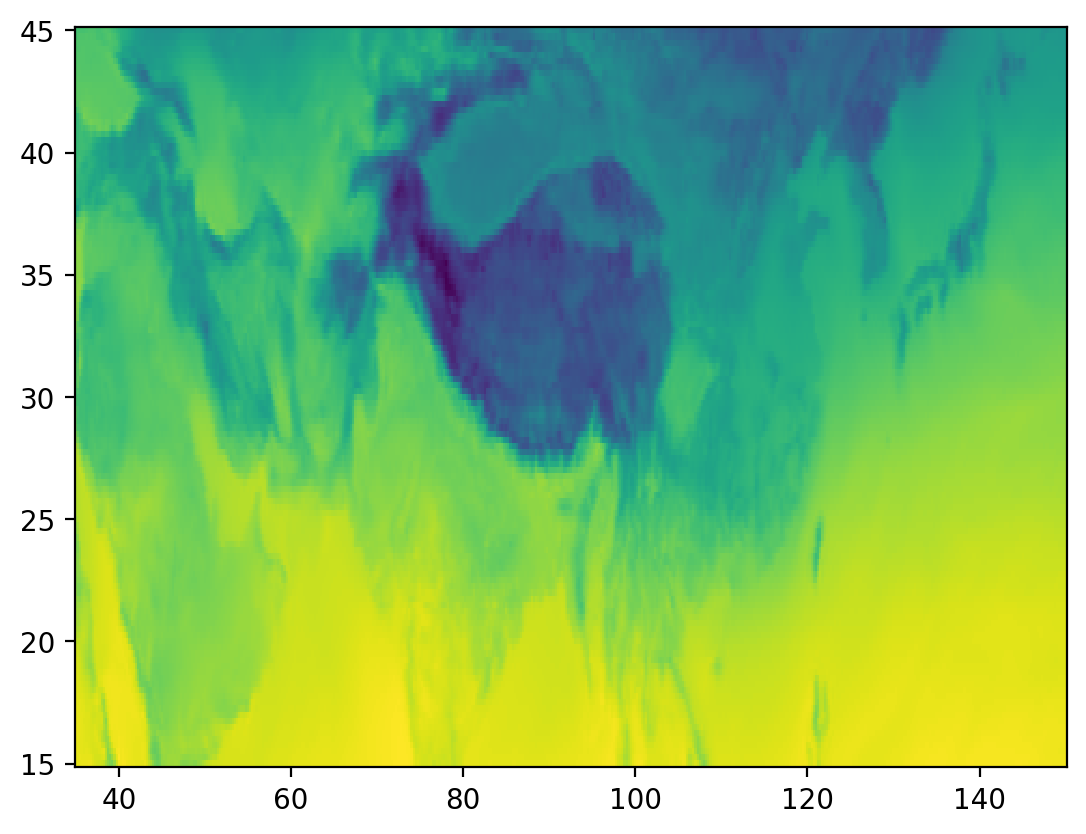

In [76]:
# plot the first timestep
lat = ds.t2m.latitude.data  # numpy array
lon = ds.t2m.longitude.data  # numpy array
temp = ds.t2m.data  # numpy array
plt.figure()
plt.pcolormesh(lon, lat, temp[0, :, :]);

In [66]:
ds

<xarray.Dataset> Size: 81MB
Dimensions:     (valid_time: 365, latitude: 121, longitude: 461)
Coordinates:
    number      int64 8B ...
  * latitude    (latitude) float64 968B 45.0 44.75 44.5 ... 15.5 15.25 15.0
  * longitude   (longitude) float64 4kB 35.0 35.25 35.5 ... 149.5 149.8 150.0
  * valid_time  (valid_time) datetime64[ns] 3kB 1979-01-01 ... 1979-12-31
Data variables:
    t2m         (valid_time, latitude, longitude) float32 81MB 282.0 ... 299.6
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-12-02T05:49 GRIB to CDM+CF via cfgrib-0.9.1...

In [84]:
temp.mean(axis=2) 

array([[267.46503, 267.75717, ..., 297.76862, 297.87238],
       [269.02887, 269.23312, ..., 297.76346, 297.85873],
       ...,
       [263.28793, 263.60477, ..., 297.56433, 297.64157],
       [262.19492, 262.49805, ..., 297.5336 , 297.6536 ]], dtype=float32)

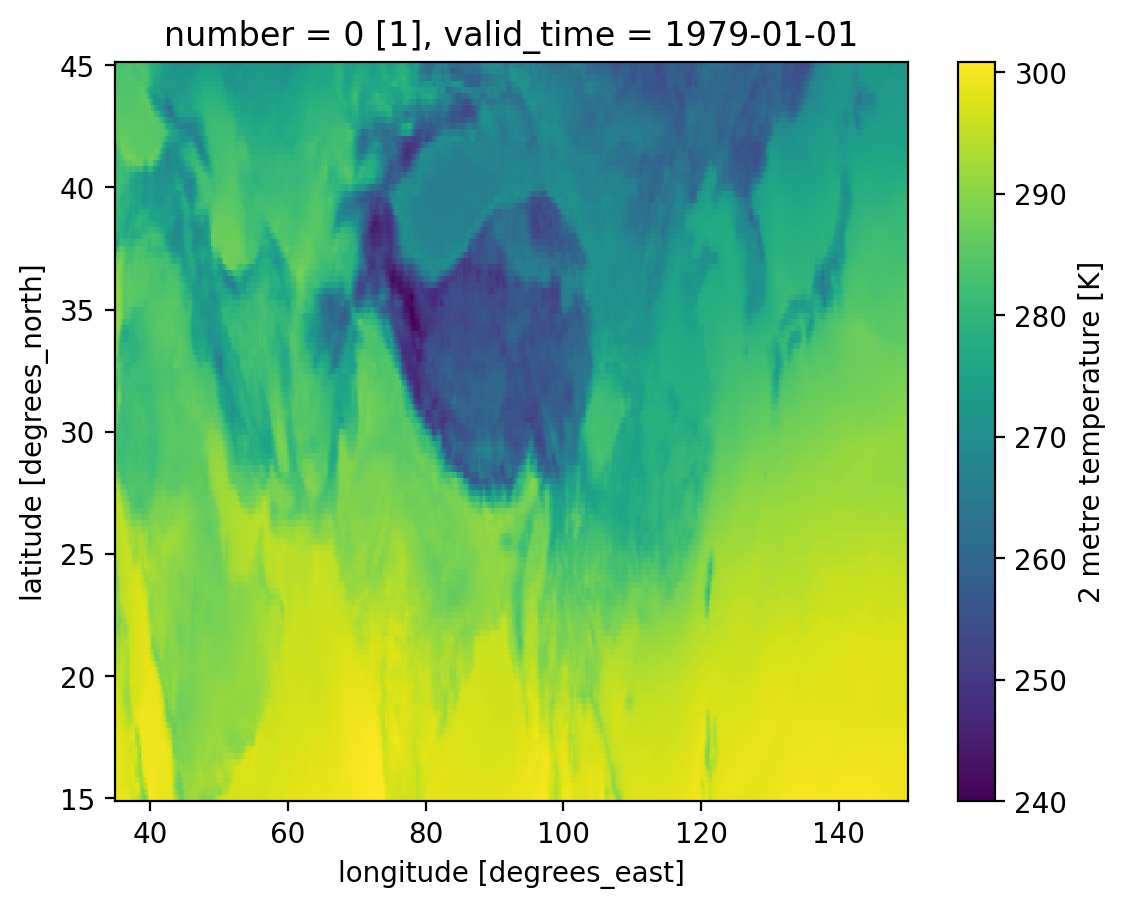

In [90]:
ds.t2m.isel(valid_time=0).plot(x="longitude");

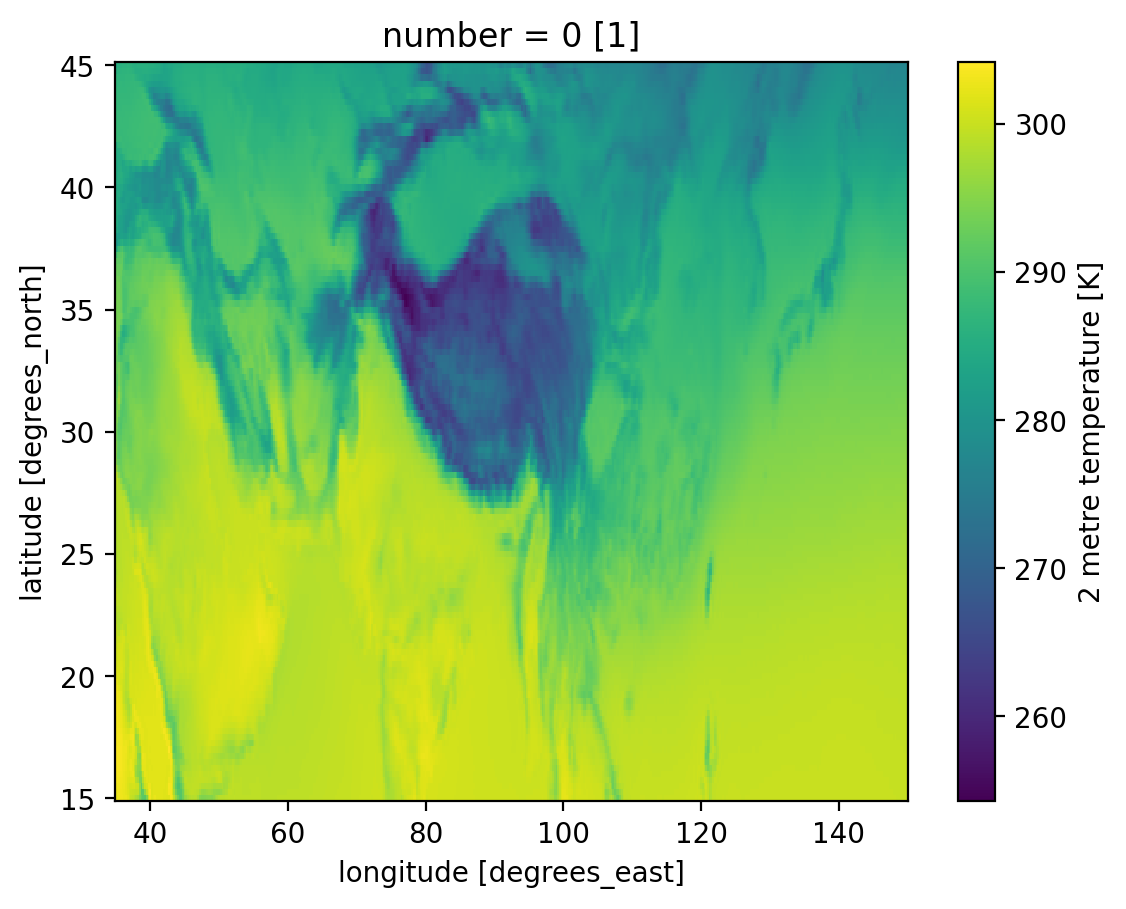

In [98]:
ds.t2m.mean(dim="valid_time").plot(x="longitude")

In [100]:
ds

<xarray.Dataset> Size: 81MB
Dimensions:     (valid_time: 365, latitude: 121, longitude: 461)
Coordinates:
    number      int64 8B ...
  * latitude    (latitude) float64 968B 45.0 44.75 44.5 ... 15.5 15.25 15.0
  * longitude   (longitude) float64 4kB 35.0 35.25 35.5 ... 149.5 149.8 150.0
  * valid_time  (valid_time) datetime64[ns] 3kB 1979-01-01 ... 1979-12-31
Data variables:
    t2m         (valid_time, latitude, longitude) float32 81MB 282.0 ... 299.6
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-12-02T05:49 GRIB to CDM+CF via cfgrib-0.9.1...

In [129]:
# pull out data for all of 2013-May
ds.sel(valid_time="1979-05")

<xarray.Dataset> Size: 7MB
Dimensions:     (valid_time: 31, latitude: 121, longitude: 461)
Coordinates:
    number      int64 8B ...
  * latitude    (latitude) float64 968B 45.0 44.75 44.5 ... 15.5 15.25 15.0
  * longitude   (longitude) float64 4kB 35.0 35.25 35.5 ... 149.5 149.8 150.0
  * valid_time  (valid_time) datetime64[ns] 248B 1979-05-01 ... 1979-05-31
Data variables:
    t2m         (valid_time, latitude, longitude) float32 7MB 289.3 ... 300.4
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-12-02T05:49 GRIB to CDM+CF via cfgrib-0.9.1...

In [131]:
# demonstrate slicing
ds.sel(valid_time=slice("1979-05-1", "1979-05-8"))

<xarray.Dataset> Size: 2MB
Dimensions:     (valid_time: 8, latitude: 121, longitude: 461)
Coordinates:
    number      int64 8B ...
  * latitude    (latitude) float64 968B 45.0 44.75 44.5 ... 15.5 15.25 15.0
  * longitude   (longitude) float64 4kB 35.0 35.25 35.5 ... 149.5 149.8 150.0
  * valid_time  (valid_time) datetime64[ns] 64B 1979-05-01 ... 1979-05-08
Data variables:
    t2m         (valid_time, latitude, longitude) float32 2MB 289.3 ... 299.5
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-12-02T05:49 GRIB to CDM+CF via cfgrib-0.9.1...

In [145]:
ds.sel(valid_time="1979-5")

<xarray.Dataset> Size: 7MB
Dimensions:     (valid_time: 31, latitude: 121, longitude: 461)
Coordinates:
    number      int64 8B ...
  * latitude    (latitude) float64 968B 45.0 44.75 44.5 ... 15.5 15.25 15.0
  * longitude   (longitude) float64 4kB 35.0 35.25 35.5 ... 149.5 149.8 150.0
  * valid_time  (valid_time) datetime64[ns] 248B 1979-05-01 ... 1979-05-31
Data variables:
    t2m         (valid_time, latitude, longitude) float32 7MB 289.3 ... 300.4
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-12-02T05:49 GRIB to CDM+CF via cfgrib-0.9.1...

In [174]:
# demonstrate "nearest" indexing
ds.sel(valid_time="1979-05-15", method="nearest")

<xarray.Dataset> Size: 228kB
Dimensions:     (latitude: 121, longitude: 461)
Coordinates:
    number      int64 8B ...
  * latitude    (latitude) float64 968B 45.0 44.75 44.5 ... 15.5 15.25 15.0
  * longitude   (longitude) float64 4kB 35.0 35.25 35.5 ... 149.5 149.8 150.0
    valid_time  datetime64[ns] 8B 1979-05-15
Data variables:
    t2m         (latitude, longitude) float32 223kB 289.0 289.4 ... 299.8 299.8
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-12-02T05:49 GRIB to CDM+CF via cfgrib-0.9.1...

In [178]:
# "nearest indexing at multiple points"
ds.sel(longitude=[240.125, 234], latitude=[40.3, 50.3], method="nearest")

<xarray.Dataset> Size: 9kB
Dimensions:     (valid_time: 365, latitude: 2, longitude: 2)
Coordinates:
    number      int64 8B ...
  * latitude    (latitude) float64 16B 40.25 45.0
  * longitude   (longitude) float64 16B 150.0 150.0
  * valid_time  (valid_time) datetime64[ns] 3kB 1979-01-01 ... 1979-12-31
Data variables:
    t2m         (valid_time, latitude, longitude) float32 6kB 278.3 ... 273.1
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-12-02T05:49 GRIB to CDM+CF via cfgrib-0.9.1...

In [180]:
ds.t2m.data[0, 2, 3]

284.1151

In [188]:
# pull out time index 0, lat index 2, and lon index 3
ds.t2m.isel(valid_time=0, latitude=2, longitude=3)  #  much better than ds.air[0, 2, 3]

<xarray.DataArray 't2m' ()> Size: 4B
array(284.1151, dtype=float32)
Coordinates:
    number      int64 8B ...
    latitude    float64 8B 44.5
    longitude   float64 8B 35.75
    valid_time  datetime64[ns] 8B 1979-01-01
Attributes: (12/33)
    GRIB_paramId:                             167
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      55781
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_units:                               K
    long_name:                                2 metre temperature
    units:                                    K
    standard_name:                            unknown
    GRIB_surface:                             0.0
    who_is_awesome:                           Xarray or wot

In [196]:
# demonstrate slicing
ds.t2m.isel(latitude=slice(10))

<xarray.DataArray 't2m' (valid_time: 365, latitude: 10, longitude: 461)> Size: 7MB
array([[[282.03323, 282.7856 , ..., 271.95944, 271.9303 ],
        [282.60568, 283.54684, ..., 272.14133, 272.1592 ],
        ...,
        [285.0243 , 285.00198, ..., 273.59534, 273.5793 ],
        [285.30994, 285.22   , ..., 273.92215, 273.891  ]],

       [[280.30023, 281.17923, ..., 273.27548, 273.26547],
        [281.46933, 282.473  , ..., 273.46933, 273.50296],
        ...,
        [284.1094 , 284.13504, ..., 274.67133, 274.64764],
        [284.46707, 284.40317, ..., 274.83304, 274.8166 ]],

       ...,

       [[276.0621 , 277.22128, ..., 274.06503, 274.04996],
        [278.86588, 280.07925, ..., 274.13004, 274.1683 ],
        ...,
        [281.75757, 281.8685 , ..., 275.18433, 275.12036],
        [281.86337, 281.92416, ..., 275.52368, 275.4479 ]],

       [[278.67123, 279.92554, ..., 272.99307, 273.13028],
        [280.75757, 281.84464, ..., 273.17593, 273.3588 ],
        ...,
        [282.7775 , 282.83292, ..., 274.72705, 274.81357],
        [282.97876, 282.9895 , ..., 275.09204, 275.1652 ]]], dtype=float32)
Coordinates:
    number      int64 8B ...
  * latitude    (latitude) float64 80B 45.0 44.75 44.5 ... 43.25 43.0 42.75
  * longitude   (longitude) float64 4kB 35.0 35.25 35.5 ... 149.5 149.8 150.0
  * valid_time  (valid_time) datetime64[ns] 3kB 1979-01-01 ... 1979-12-31
Attributes: (12/33)
    GRIB_paramId:                             167
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      55781
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_units:                               K
    long_name:                                2 metre temperature
    units:                                    K
    standard_name:                            unknown
    GRIB_surface:                             0.0
    who_is_awesome:                           Xarray or wot

# plotting practice


In [220]:
# List variables and coordinates in the dataset
print("Variables in the Dataset:")
print(ds.data_vars)

print("\nCoordinates in the Dataset:")
print(ds.coords)

# Access the `t2m` variable
t2m = ds["t2m"]
print("\n`t2m` Variable Details:")
print(t2m)


Variables in the Dataset:
Data variables:
    t2m      (valid_time, latitude, longitude) float32 81MB 282.0 ... 299.6

Coordinates in the Dataset:
Coordinates:
    number      int64 8B ...
  * latitude    (latitude) float64 968B 45.0 44.75 44.5 ... 15.5 15.25 15.0
  * longitude   (longitude) float64 4kB 35.0 35.25 35.5 ... 149.5 149.8 150.0
  * valid_time  (valid_time) datetime64[ns] 3kB 1979-01-01 ... 1979-12-31

`t2m` Variable Details:
<xarray.DataArray 't2m' (valid_time: 365, latitude: 121, longitude: 461)> Size: 81MB
array([[[282.03323, 282.7856 , ..., 271.95944, 271.9303 ],
        [282.60568, 283.54684, ..., 272.14133, 272.1592 ],
        ...,
        [298.328  , 298.43942, ..., 299.23425, 299.28284],
        [298.38333, 298.499  , ..., 299.4119 , 299.44144]],

       [[280.30023, 281.17923, ..., 273.27548, 273.26547],
        [281.46933, 282.473  , ..., 273.46933, 273.50296],
        ...,
        [298.09866, 298.2252 , ..., 299.2794 , 299.23456],
        [298.1741 , 298.29984, .

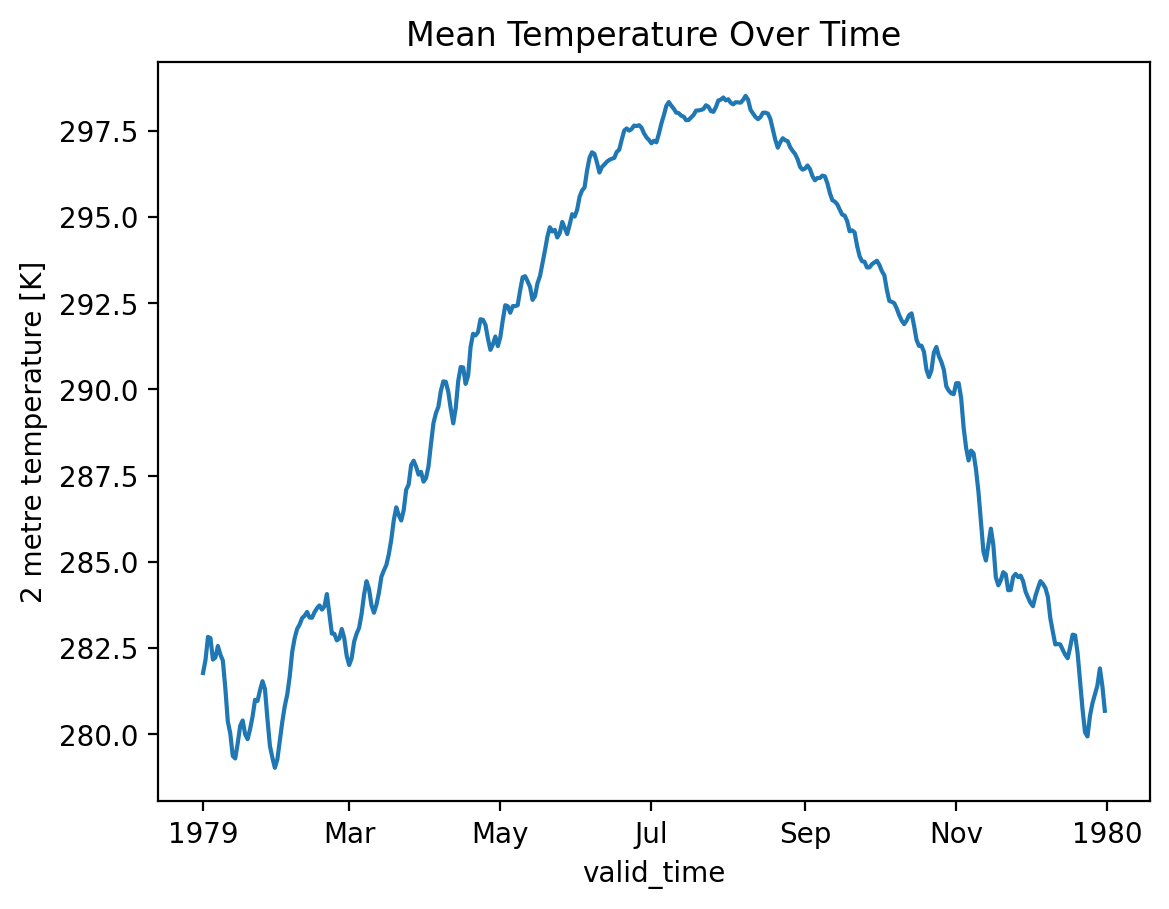

In [222]:
# Mean temperature over time (spatial average)
mean_temp_time = t2m.mean(dim=["latitude", "longitude"])

# Plot the mean temperature over time
mean_temp_time.plot()
plt.title("Mean Temperature Over Time")
plt.show()


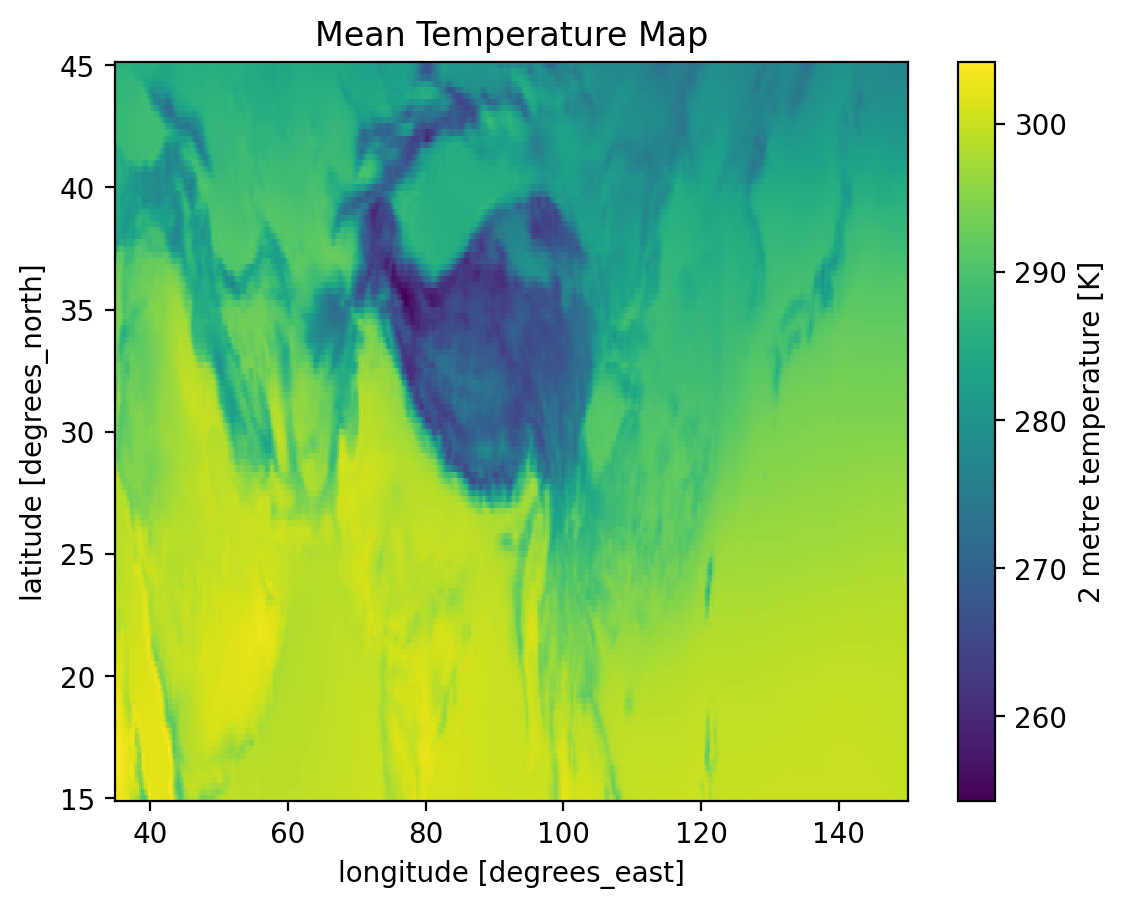

In [224]:
# Mean temperature map (temporal average)
mean_temp_map = t2m.mean(dim="valid_time")

# Plot the mean temperature map
mean_temp_map.plot(cmap="viridis")
plt.title("Mean Temperature Map")
plt.show()


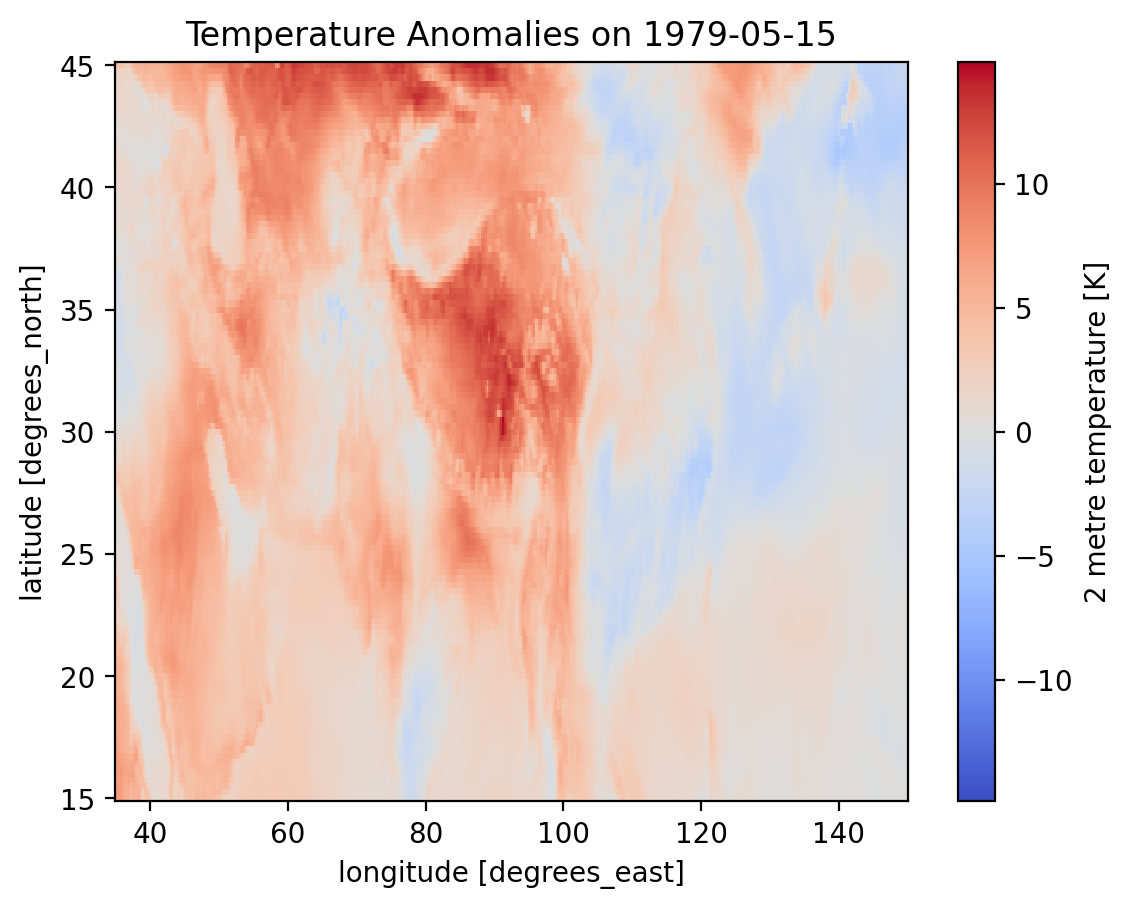

In [226]:
# Temperature anomalies (deviation from temporal mean)
temp_anomaly = t2m - t2m.mean(dim="valid_time")

# Select a specific time slice to visualize anomalies
date_to_plot = "1979-05-15"  # Replace with a valid date in your dataset
temp_anomaly.sel(valid_time=date_to_plot).plot(cmap="coolwarm")
plt.title(f"Temperature Anomalies on {date_to_plot}")
plt.show()


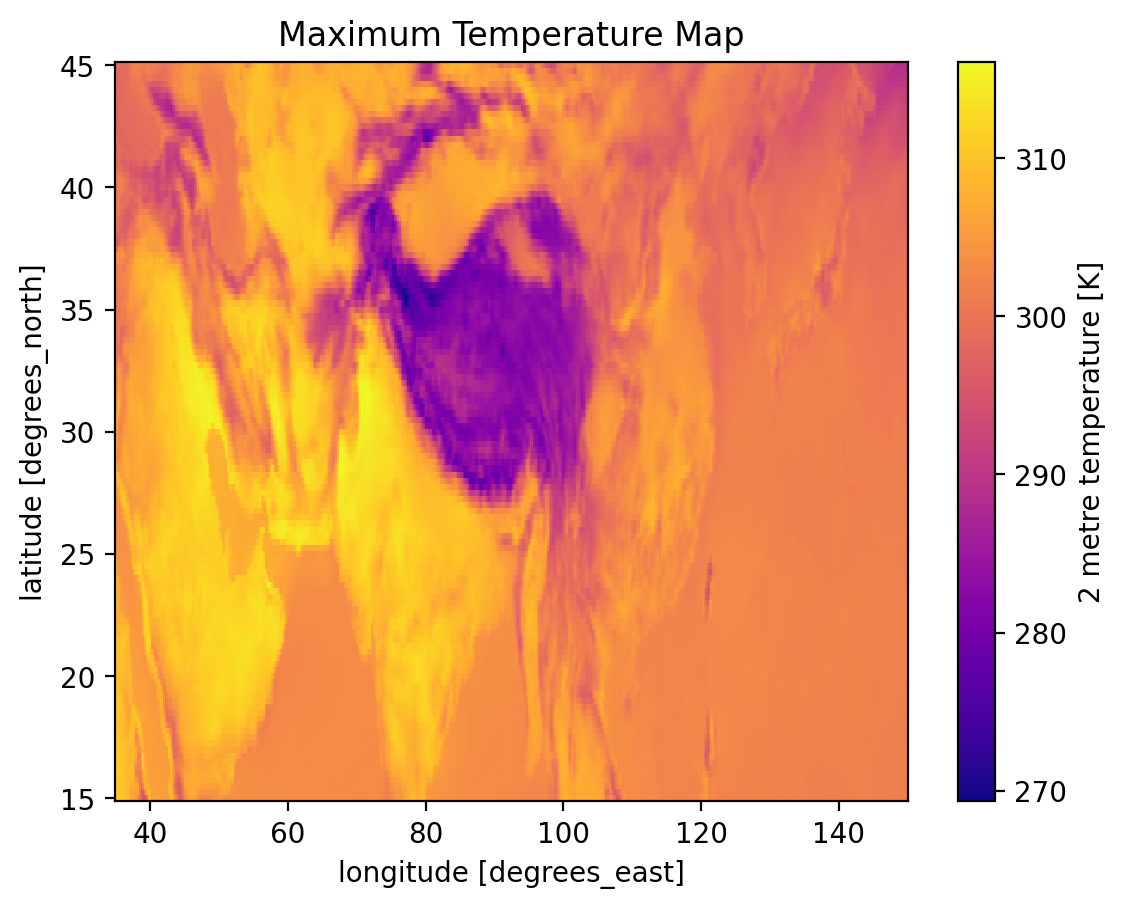

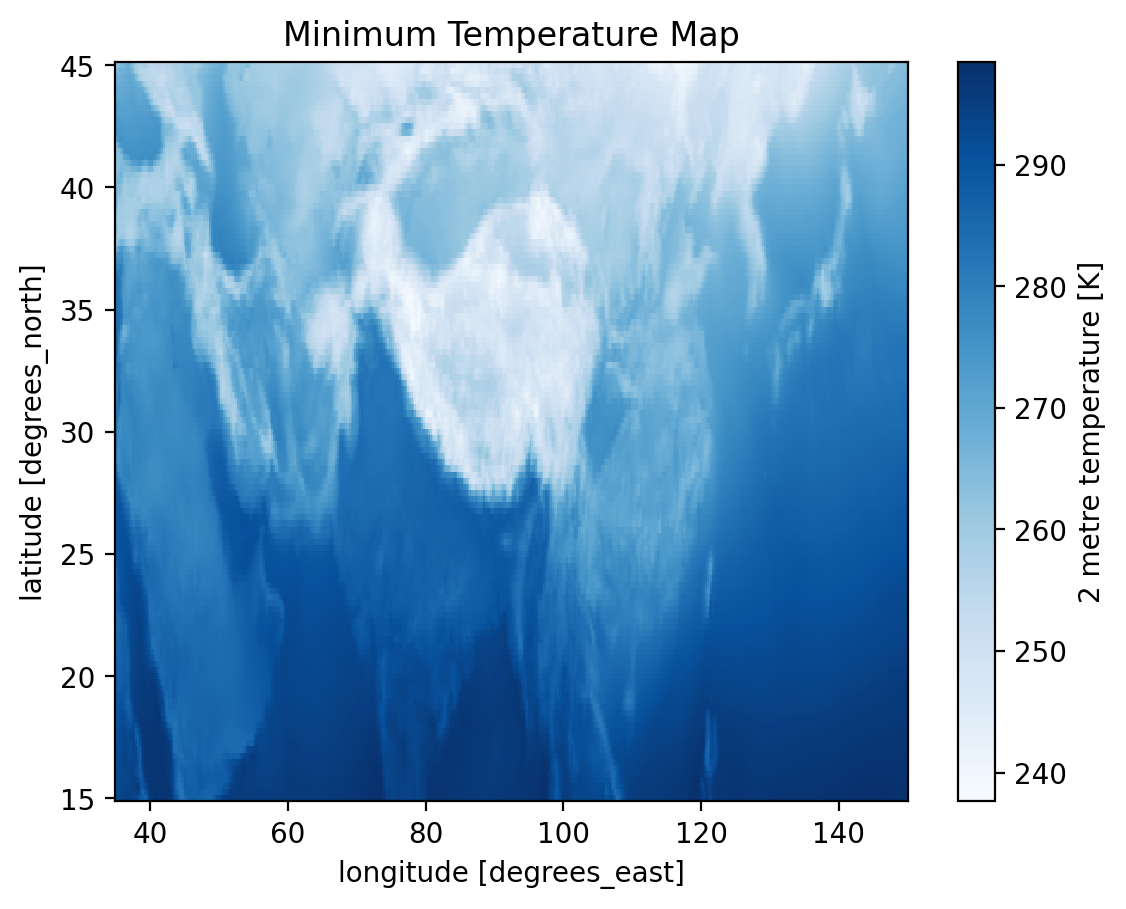

In [228]:
# Maximum and minimum temperature maps over time
max_temp_map = t2m.max(dim="valid_time")
min_temp_map = t2m.min(dim="valid_time")

# Plot maximum temperature map
max_temp_map.plot(cmap="plasma")
plt.title("Maximum Temperature Map")
plt.show()

# Plot minimum temperature map
min_temp_map.plot(cmap="Blues")
plt.title("Minimum Temperature Map")
plt.show()


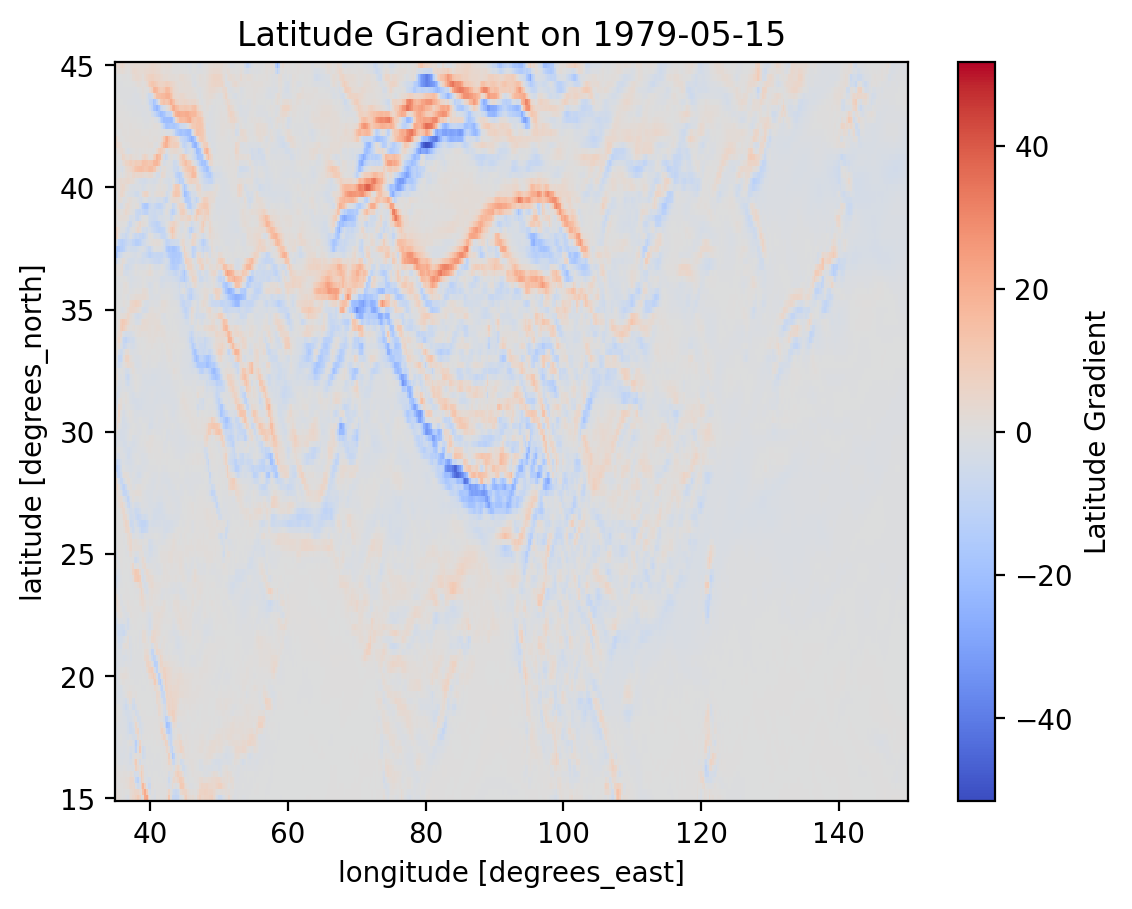

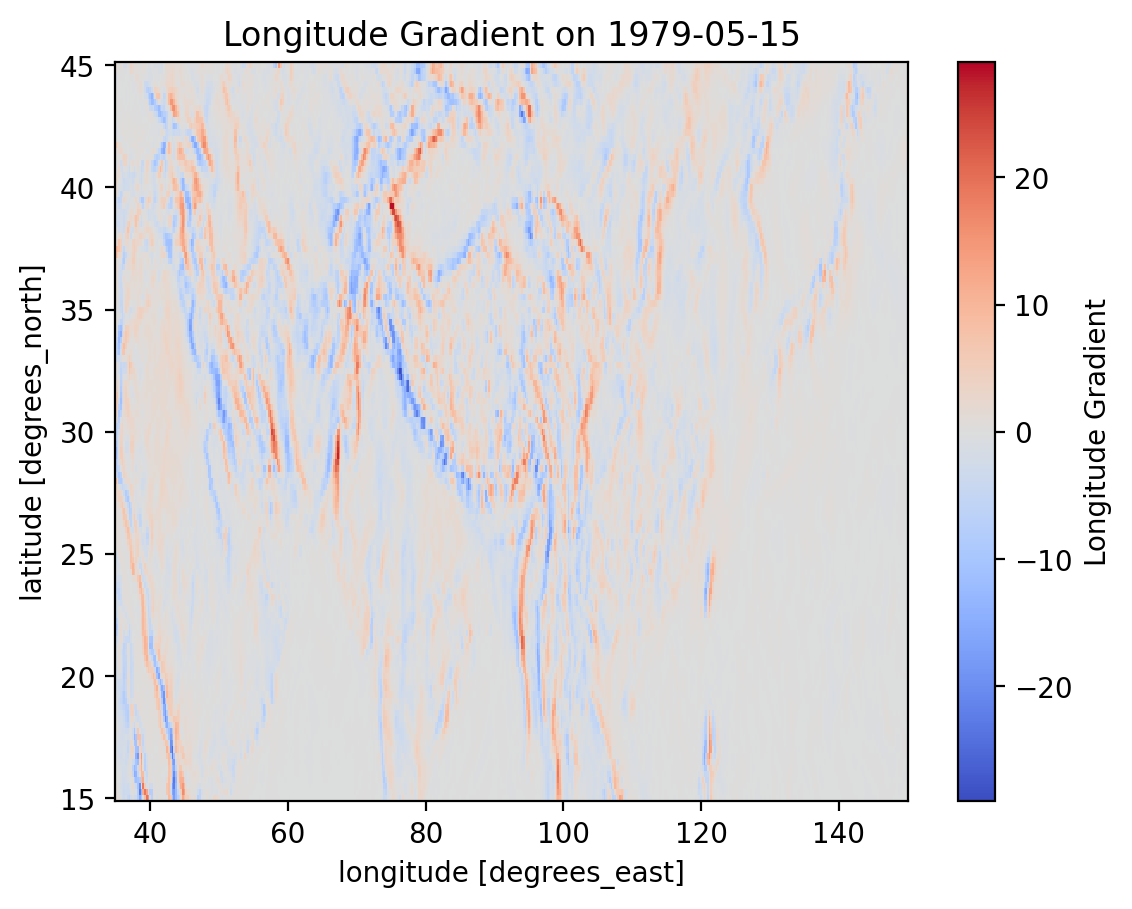

In [230]:
# Calculate spatial gradients using numpy
lat_grad, lon_grad = np.gradient(t2m, ds.latitude, ds.longitude, axis=(1, 2))

# Convert gradients to xarray DataArray for better visualization
lat_grad = xr.DataArray(lat_grad, dims=t2m.dims, coords=t2m.coords, name="Latitude Gradient")
lon_grad = xr.DataArray(lon_grad, dims=t2m.dims, coords=t2m.coords, name="Longitude Gradient")

# Plot latitude gradient for a specific time slice
lat_grad.sel(valid_time=date_to_plot).plot(cmap="coolwarm")
plt.title(f"Latitude Gradient on {date_to_plot}")
plt.show()

# Plot longitude gradient for a specific time slice
lon_grad.sel(valid_time=date_to_plot).plot(cmap="coolwarm")
plt.title(f"Longitude Gradient on {date_to_plot}")
plt.show()


In [256]:
'''Concepts for computation Consider calculating the mean air temperature per unit surface area for this dataset. Because latitude and longitude correspond to spherical coordinates for Earth’s surface, each 2.5x2.5 degree grid cell actually has a different surface area as you move away from the equator! This is because latitudinal length is fixed (), but longitudinal length varies with latitude ()So the area element for lat-lon coordinates iswhere is latitude, is the spacing of the points in latitude, is the spacing of the points in longitude, and is Earth’s radius. (In this formula, and 
 are measurein radians)'''

'Concepts for computation Consider calculating the mean air temperature per unit surface area for this dataset. Because latitude and longitude correspond to spherical coordinates for Earth’s surface, each 2.5x2.5 degree grid cell actually has a different surface area as you move away from the equator! This is because latitudinal length is fixed (), but longitudinal length varies with latitude ()So the area element for lat-lon coordinates iswhere is latitude, is the spacing of the points in latitude, is the spacing of the points in longitude, and is Earth’s radius. (In this formula, and \n are measurein radians)'

In [270]:
# Earth's average radius in meters
R = 6.371e6

# Coordinate spacing for this dataset is 2.5 x 2.5 degrees
dϕ = np.deg2rad(2.5)
dλ = np.deg2rad(2.5)

dlat = R * dϕ * xr.ones_like(ds.t2m.longitude)
dlon = R * dλ * np.cos(np.deg2rad(ds.t2m.latitude))
dlon.name = "dlon"
dlat.name = "dlat"

In [274]:
# returns an xarray DataArray!
np.cos(np.deg2rad(ds.latitude))

<xarray.DataArray 'latitude' (latitude: 121)> Size: 968B
0.7071 0.7102 0.7133 0.7163 0.7193 0.7224 ... 0.9613 0.9625 0.9636 0.9648 0.9659
Coordinates:
    number    int64 8B ...
  * latitude  (latitude) float64 968B 45.0 44.75 44.5 44.25 ... 15.5 15.25 15.0
Attributes:
    units:             degrees_north
    standard_name:     latitude
    long_name:         latitude
    stored_direction:  decreasing

In [276]:
# cell latitude length is constant with longitude
dlat

<xarray.DataArray 'dlat' (longitude: 461)> Size: 4kB
2.78e+05 2.78e+05 2.78e+05 2.78e+05 ... 2.78e+05 2.78e+05 2.78e+05 2.78e+05
Coordinates:
    number     int64 8B ...
  * longitude  (longitude) float64 4kB 35.0 35.25 35.5 ... 149.5 149.8 150.0
Attributes:
    units:          degrees_east
    standard_name:  longitude
    long_name:      longitude

In [278]:
# cell longitude length changes with latitude
dlon

<xarray.DataArray 'dlon' (latitude: 121)> Size: 968B
1.966e+05 1.974e+05 1.983e+05 1.991e+05 ... 2.679e+05 2.682e+05 2.685e+05
Coordinates:
    number    int64 8B ...
  * latitude  (latitude) float64 968B 45.0 44.75 44.5 44.25 ... 15.5 15.25 15.0
Attributes:
    units:             degrees_north
    standard_name:     latitude
    long_name:         latitude
    stored_direction:  decreasing

# Broadcasting: expanding data


In [280]:
cell_area = dlon * dlat
cell_area

<xarray.DataArray (latitude: 121, longitude: 461)> Size: 446kB
5.464e+10 5.464e+10 5.464e+10 5.464e+10 ... 7.464e+10 7.464e+10 7.464e+10
Coordinates:
    number     int64 8B 0
  * latitude   (latitude) float64 968B 45.0 44.75 44.5 44.25 ... 15.5 15.25 15.0
  * longitude  (longitude) float64 4kB 35.0 35.25 35.5 ... 149.5 149.8 150.0
Attributes:
    units:             degrees_north
    standard_name:     latitude
    long_name:         latitude
    stored_direction:  decreasing

# Alignment: putting data on the same grid

In [287]:
ds.t2m.isel(valid_time=1) / cell_area

<xarray.DataArray (latitude: 121, longitude: 461)> Size: 446kB
5.13e-09 5.146e-09 5.151e-09 5.154e-09 ... 4.01e-09 4.01e-09 4.009e-09 4.008e-09
Coordinates:
    number      int64 8B 0
  * latitude    (latitude) float64 968B 45.0 44.75 44.5 ... 15.5 15.25 15.0
  * longitude   (longitude) float64 4kB 35.0 35.25 35.5 ... 149.5 149.8 150.0
    valid_time  datetime64[ns] 8B 1979-01-02
Attributes: (12/32)
    GRIB_paramId:                             167
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      55781
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_totalNumber:                         0
    GRIB_units:                               K
    long_name:                                2 metre temperature
    units:                                    K
    standard_name:                            unknown
    GRIB_surface:                             0.0

In [297]:
# make a copy of cell_area
# then add 1e-5 degrees to latitude
cell_area_bad = cell_area.copy(deep=True)
cell_area_bad["latitude"] = cell_area.latitude + 1e-5  # latitudes are off by 1e-5 degrees!
cell_area_bad

<xarray.DataArray (latitude: 121, longitude: 461)> Size: 446kB
5.464e+10 5.464e+10 5.464e+10 5.464e+10 ... 7.464e+10 7.464e+10 7.464e+10
Coordinates:
    number     int64 8B 0
  * longitude  (longitude) float64 4kB 35.0 35.25 35.5 ... 149.5 149.8 150.0
  * latitude   (latitude) float64 968B 45.0 44.75 44.5 44.25 ... 15.5 15.25 15.0
Attributes:
    units:             degrees_north
    standard_name:     latitude
    long_name:         latitude
    stored_direction:  decreasing

In [319]:
ds

<xarray.Dataset> Size: 81MB
Dimensions:     (valid_time: 365, latitude: 121, longitude: 461)
Coordinates:
    number      int64 8B ...
  * latitude    (latitude) float64 968B 45.0 44.75 44.5 ... 15.5 15.25 15.0
  * longitude   (longitude) float64 4kB 35.0 35.25 35.5 ... 149.5 149.8 150.0
  * valid_time  (valid_time) datetime64[ns] 3kB 1979-01-01 ... 1979-12-31
Data variables:
    t2m         (valid_time, latitude, longitude) float32 81MB 282.0 ... 299.6
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-12-02T05:49 GRIB to CDM+CF via cfgrib-0.9.1...

In [321]:
# seasonal groups
ds.groupby("valid_time.season")

<DatasetGroupBy, grouped over 1 grouper(s), 4 groups in total:
    'season': 4/4 groups present with labels 'DJF', 'JJA', 'MAM', 'SON'>

In [325]:
# make a seasonal mean
seasonal_mean = ds.groupby("valid_time.season").mean()
seasonal_mean

<xarray.Dataset> Size: 897kB
Dimensions:    (season: 4, latitude: 121, longitude: 461)
Coordinates:
    number     int64 8B 0
  * latitude   (latitude) float64 968B 45.0 44.75 44.5 44.25 ... 15.5 15.25 15.0
  * longitude  (longitude) float64 4kB 35.0 35.25 35.5 ... 149.5 149.8 150.0
  * season     (season) object 32B 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    t2m        (season, latitude, longitude) float32 892kB 275.9 276.7 ... 300.5
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-12-02T05:49 GRIB to CDM+CF via cfgrib-0.9.1...

In [327]:
seasonal_mean = seasonal_mean.sel(season=["DJF", "MAM", "JJA", "SON"])
seasonal_mean

<xarray.Dataset> Size: 897kB
Dimensions:    (season: 4, latitude: 121, longitude: 461)
Coordinates:
    number     int64 8B 0
  * latitude   (latitude) float64 968B 45.0 44.75 44.5 44.25 ... 15.5 15.25 15.0
  * longitude  (longitude) float64 4kB 35.0 35.25 35.5 ... 149.5 149.8 150.0
  * season     (season) object 32B 'DJF' 'MAM' 'JJA' 'SON'
Data variables:
    t2m        (season, latitude, longitude) float32 892kB 275.9 276.7 ... 300.5
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-12-02T05:49 GRIB to CDM+CF via cfgrib-0.9.1...

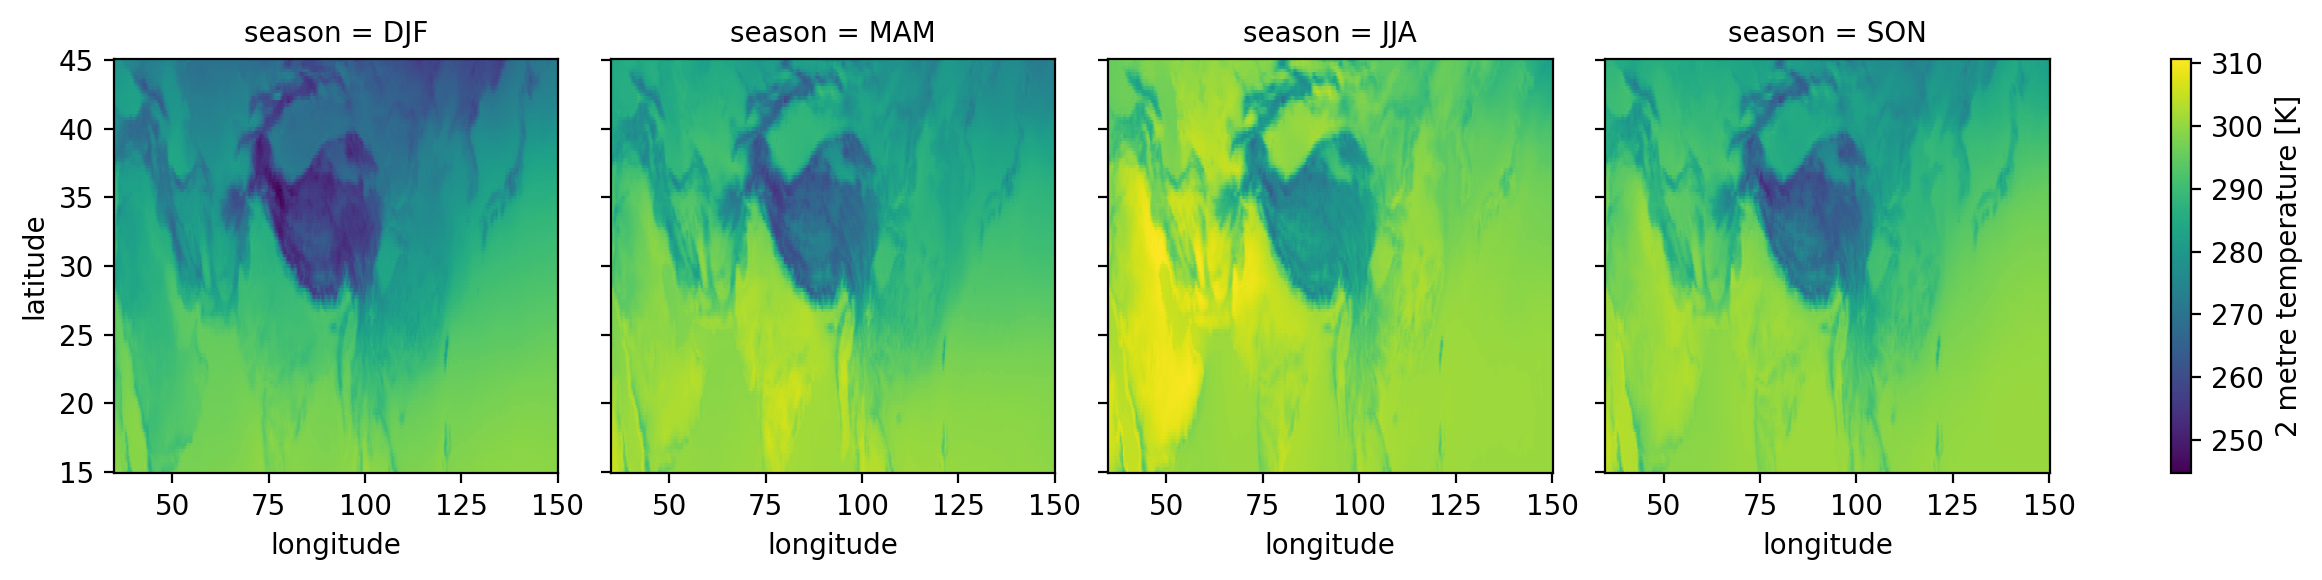

In [331]:
seasonal_mean.t2m.plot(col="season")

In [343]:
# resample to monthly frequency
ds.resample(valid_time="ME").mean()

<xarray.Dataset> Size: 3MB
Dimensions:     (valid_time: 12, latitude: 121, longitude: 461)
Coordinates:
    number      int64 8B 0
  * latitude    (latitude) float64 968B 45.0 44.75 44.5 ... 15.5 15.25 15.0
  * longitude   (longitude) float64 4kB 35.0 35.25 35.5 ... 149.5 149.8 150.0
  * valid_time  (valid_time) datetime64[ns] 96B 1979-01-31 ... 1979-12-31
Data variables:
    t2m         (valid_time, latitude, longitude) float32 3MB 275.2 ... 299.6
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-12-02T05:49 GRIB to CDM+CF via cfgrib-0.9.1...

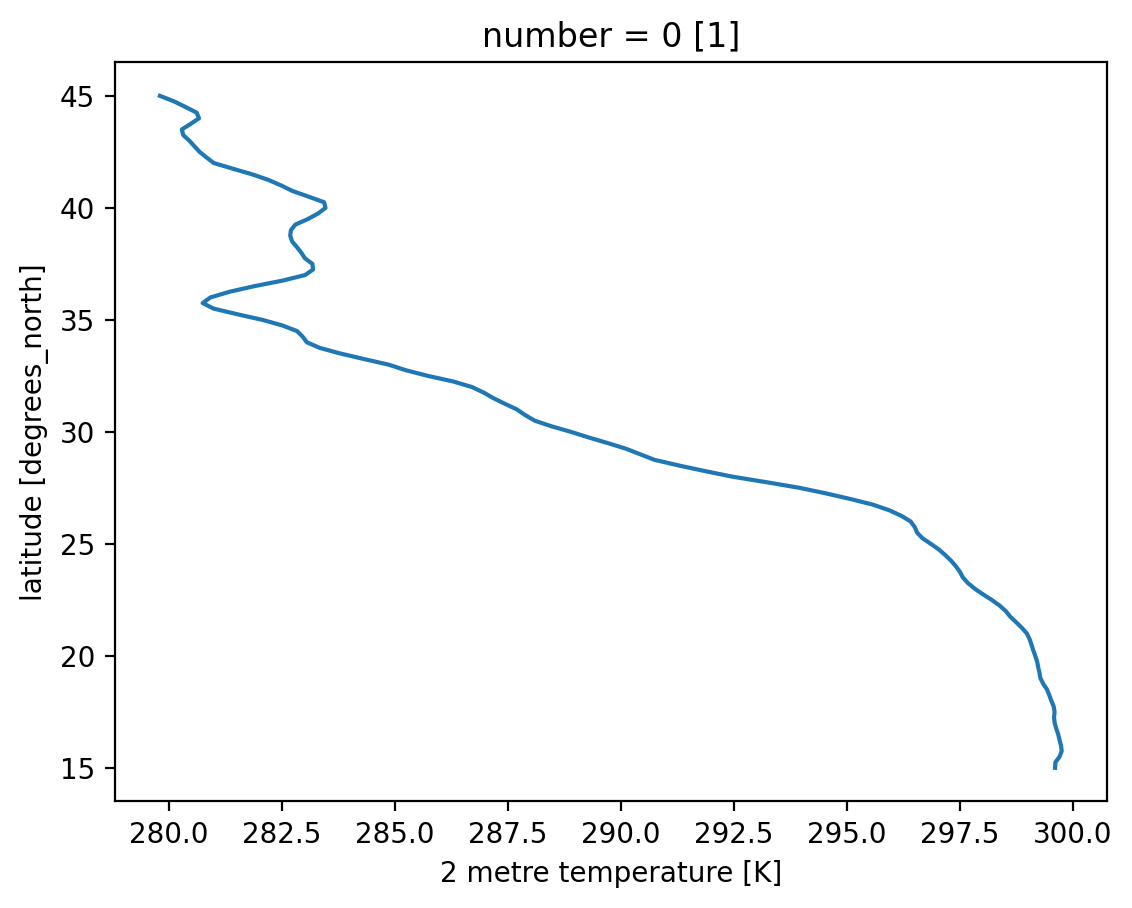

In [347]:
# weight by cell_area and take mean over (time, lon)
ds.weighted(cell_area).mean(["longitude", "valid_time"]).t2m.plot(y="latitude");

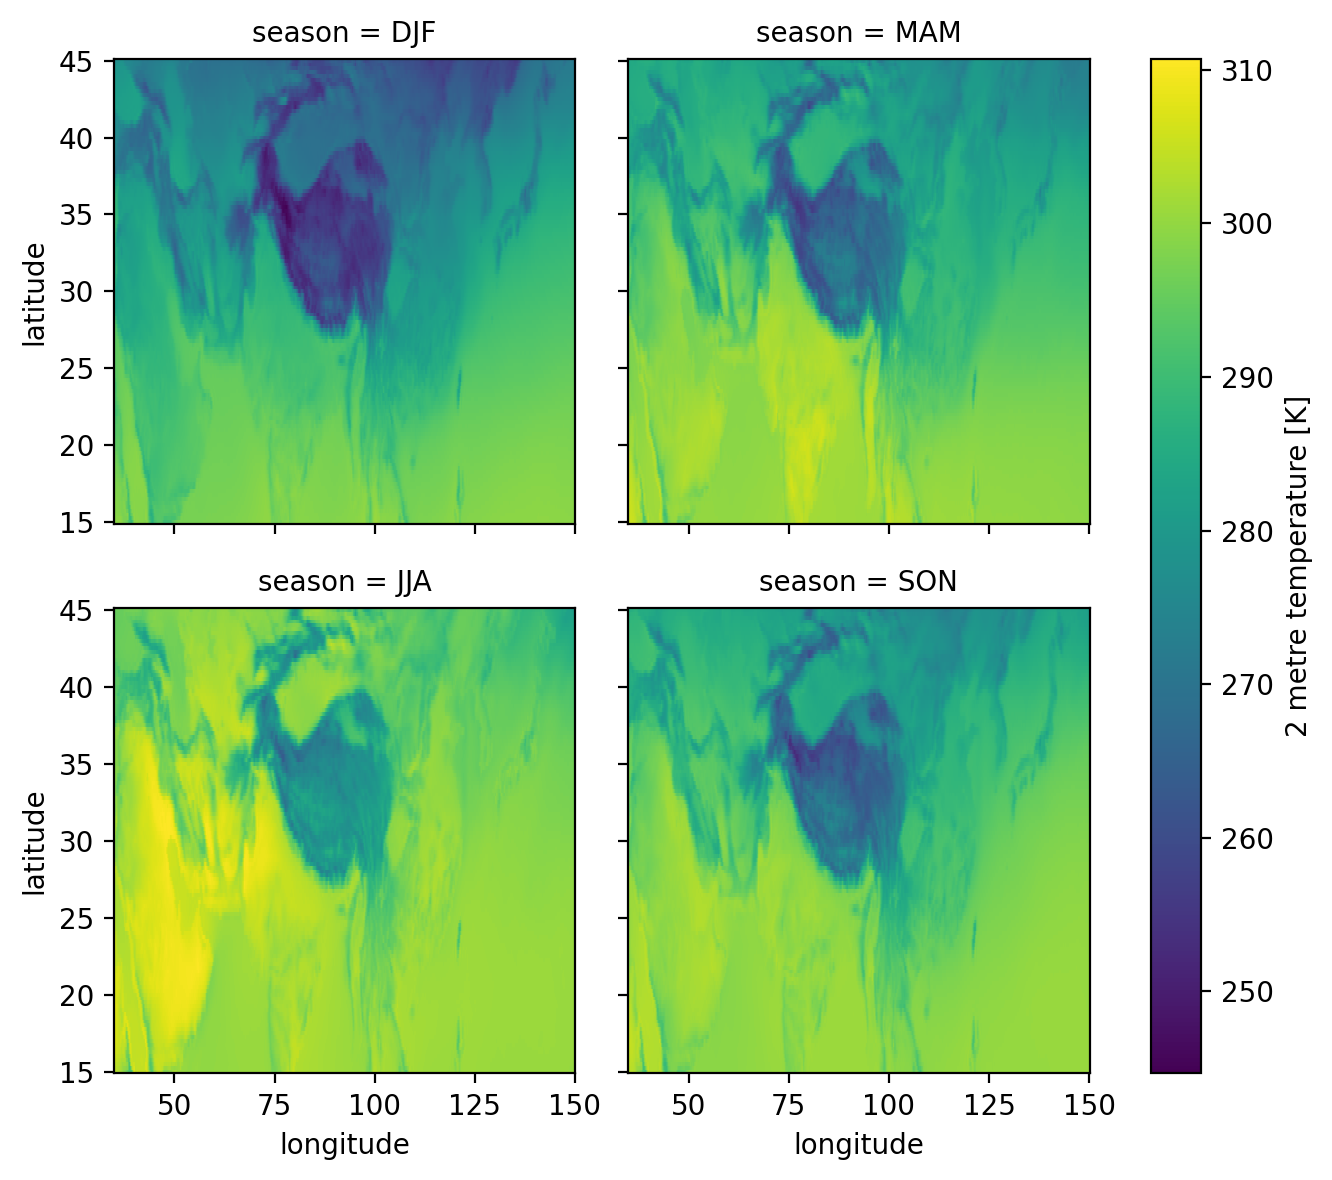

In [349]:
# facet the seasonal_mean
seasonal_mean.t2m.plot(col="season", col_wrap=2);

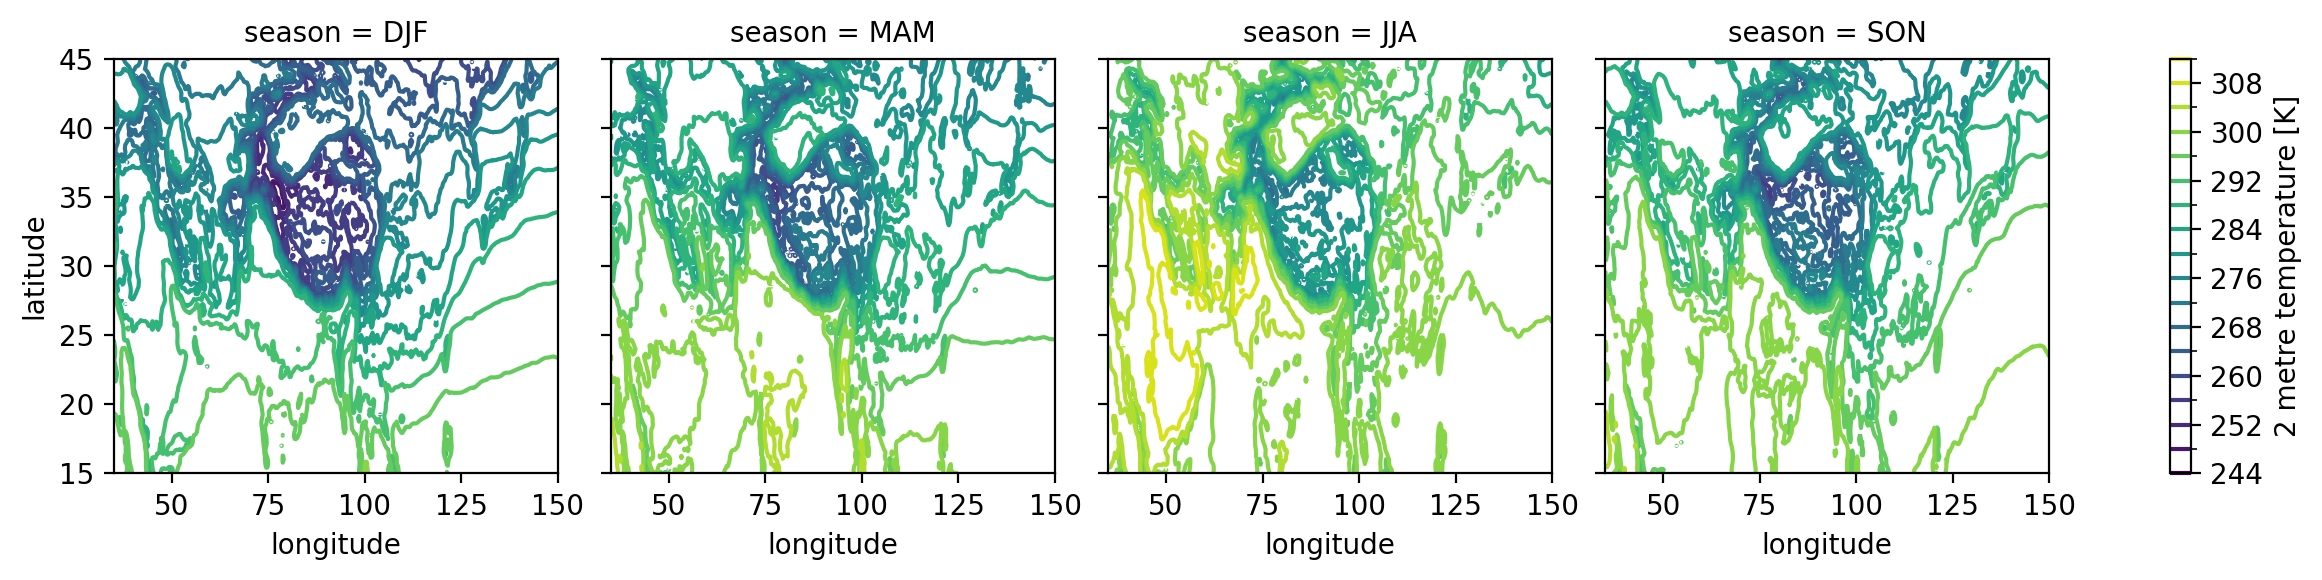

In [351]:
# contours
seasonal_mean.t2m.plot.contour(col="season", levels=20, add_colorbar=True);

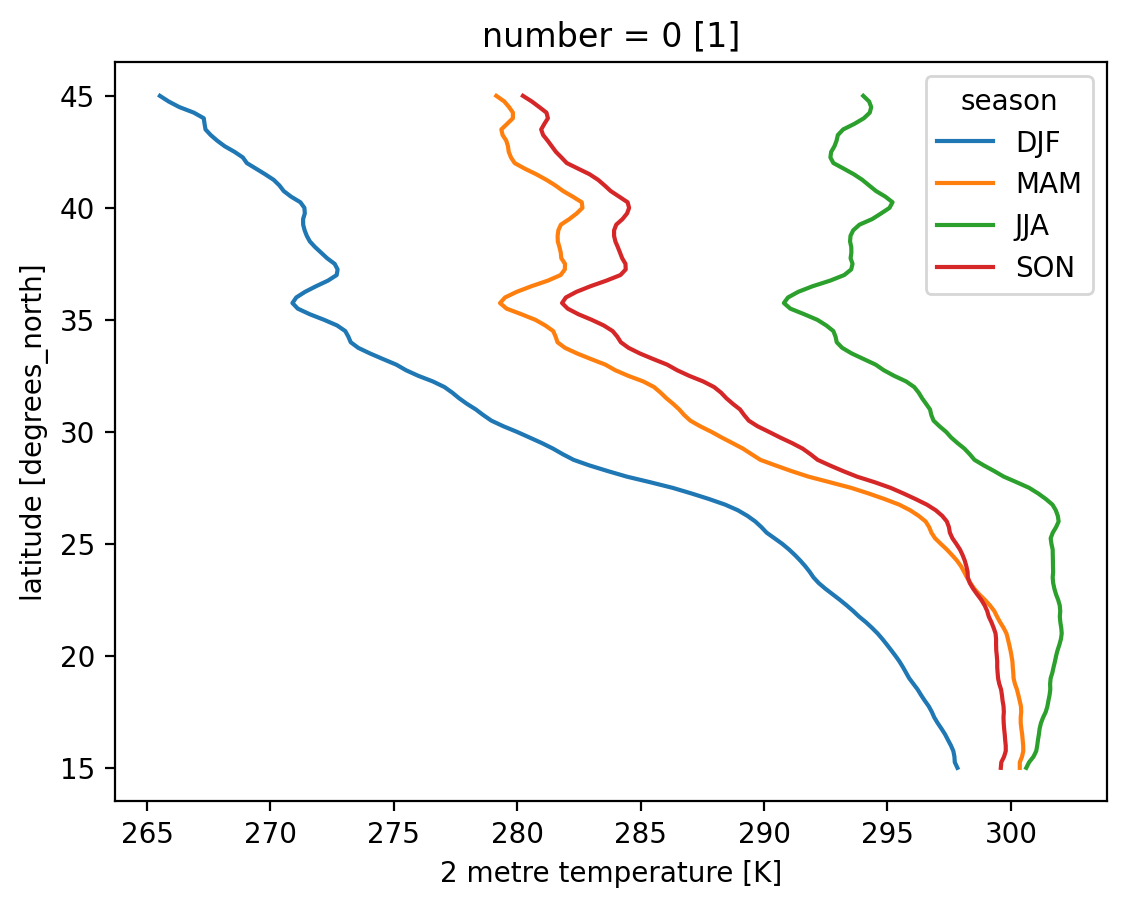

In [357]:
# line plots too? wut
seasonal_mean.t2m.mean("longitude").plot.line(hue="season", y="latitude");

## Dask
#### using "air_tempratre"


In [363]:
# demonstrate dask dataset
dasky = xr.tutorial.open_dataset(
    "air_temperature",
    chunks={"time": 10},  # 10 time steps in each block
)

dasky.air

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)> Size: 31MB
dask.array<chunksize=(10, 25, 53), meta=np.ndarray>
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

In [365]:
# demonstrate lazy mean
dasky.air.mean("lat")


<xarray.DataArray 'air' (time: 2920, lon: 53)> Size: 1MB
dask.array<chunksize=(10, 53), meta=np.ndarray>
Coordinates:
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

In [367]:
# "compute" the mean
dasky.air.mean("lat").compute()

<xarray.DataArray 'air' (time: 2920, lon: 53)> Size: 1MB
279.4 279.7 279.7 279.7 280.0 279.9 ... 277.4 278.3 278.9 279.4 280.0 280.5
Coordinates:
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

## HoloViz

In [1]:
import hvplot.xarray

ds.t2m.hvplot(groupby="valid_time", clim=(270, 300), widget_location='bottom')


ModuleNotFoundError: No module named 'hvplot'